In [1]:
import pandas as pd
df1 = pd.read_csv('churnprediction.csv',sep=',',index_col=['customer_id'])
df1.head(5)


,product,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn
customer_id,,,,,,,,,,,,,,
285fae8412c4720a0c79d95f98434422,Kartu A,27734.30,24381.32,22000.0,33009.9,25669.97,1716.0,2145.0,0.0,792.0,11000.0,15,776,0
f45bce87ca6bf100f222fcc0db06b624,Kartu A,26433.00,26515.50,0.0,0.0,0.00,0.0,15444.0,0.0,0.0,74151.0,13,352,0
09b54557b1e2a10d998e3473a9ccd2a0,Kartu A,93212.17,67101.83,0.0,0.0,0.00,86795.5,94649.5,330.0,1485.0,27467.0,15,1987,0
11f252f48be36f93dd429f2ec86cb2f5,Kartu A,183.33,1087.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2,285,0
a8df29ae9195eea348d2f74c967b978d,Kartu A,95296.67,76246.50,0.0,0.0,11000.00,118800.0,104940.0,0.0,0.0,63855.0,15,1081,0


In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 285fae8412c4720a0c79d95f98434422 to 2c5bc32bc9a9c393d393bfc11c409b0d
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   product      10000 non-null  object 
 1   reload_1     10000 non-null  float64
 2   reload_2     10000 non-null  float64
 3   video        10000 non-null  float64
 4   music        10000 non-null  float64
 5   games        10000 non-null  float64
 6   chat_1       10000 non-null  float64
 7   chat_2       10000 non-null  float64
 8   socmed_1     10000 non-null  float64
 9   socmed_2     10000 non-null  float64
 10  internet     10000 non-null  float64
 11  days_active  10000 non-null  int64  
 12  tenure       10000 non-null  int64  
 13  churn        10000 non-null  int64  
dtypes: float64(10), int64(3), object(1)
memory usage: 1.1+ MB


In [3]:
dfAktifChurn = df1.groupby('churn').count()

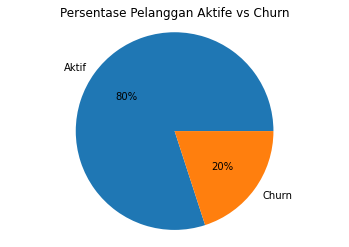

In [4]:
import matplotlib.pyplot as plt
plt.pie(dfAktifChurn['product'],labels=['Aktif','Churn'],autopct='%1.0f%%')
plt.title('Persentase Pelanggan Aktife vs Churn')
plt.axis('equal')
plt.show()

In [5]:
df1['product'].value_counts()

Kartu C    7548
Kartu B    1679
Kartu A     773
Name: product, dtype: int64

In [6]:
pd.get_dummies(df1['product'])

,Kartu A,Kartu B,Kartu C
customer_id,,,
285fae8412c4720a0c79d95f98434422,1,0,0
f45bce87ca6bf100f222fcc0db06b624,1,0,0
09b54557b1e2a10d998e3473a9ccd2a0,1,0,0
11f252f48be36f93dd429f2ec86cb2f5,1,0,0
a8df29ae9195eea348d2f74c967b978d,1,0,0
...,...,...,...
9e8b318d96caa9c0c4a50e8e59f5026c,0,1,0
a310627191bdbded3905ac73e77fe319,0,1,0
b6f11059e5c1df69b8c16d5c39af23dc,0,1,0


In [7]:
df2 = pd.concat([df1,pd.get_dummies(df1['product'])],axis=1,sort=False)

In [8]:
df2.drop(['product'],axis=1,inplace=True)

# Fiture Selection

<AxesSubplot:>

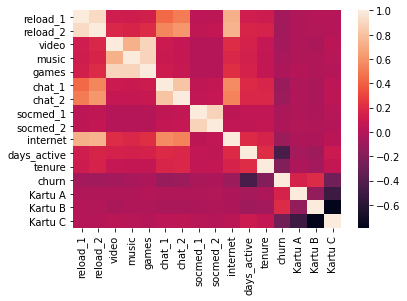

In [9]:
import seaborn as sns
sns.heatmap(df2.corr())

In [10]:
X = df2.drop(['reload_2','socmed_2','games','music','churn'],axis=1, inplace=False)

In [11]:
y = df2['churn']

In [12]:
import sklearn.model_selection as ms
X_train,X_test,y_train,y_test = ms.train_test_split(X,y,test_size=0.8, random_state=0)

In [13]:
df2.head()

,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn,Kartu A,Kartu B,Kartu C
customer_id,,,,,,,,,,,,,,,,
285fae8412c4720a0c79d95f98434422,27734.30,24381.32,22000.0,33009.9,25669.97,1716.0,2145.0,0.0,792.0,11000.0,15,776,0,1,0,0
f45bce87ca6bf100f222fcc0db06b624,26433.00,26515.50,0.0,0.0,0.00,0.0,15444.0,0.0,0.0,74151.0,13,352,0,1,0,0
09b54557b1e2a10d998e3473a9ccd2a0,93212.17,67101.83,0.0,0.0,0.00,86795.5,94649.5,330.0,1485.0,27467.0,15,1987,0,1,0,0
11f252f48be36f93dd429f2ec86cb2f5,183.33,1087.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2,285,0,1,0,0
a8df29ae9195eea348d2f74c967b978d,95296.67,76246.50,0.0,0.0,11000.00,118800.0,104940.0,0.0,0.0,63855.0,15,1081,0,1,0,0


# Normailasi data

import sklearn.preprocessing as pp
scl = pp.StandardScaler(copy=True, with_mean=True, with_std=True)
scl.fit(X_train)
X_train = scl.transform(X_train)
X_test = scl.transform(X_test)

# Logistic Regression

In [15]:
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import sklearn.metrics as met
model = lm.LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression()

# Melatih model

In [16]:
y_prediksi = model.predict(X_test)
print(y_prediksi)

[1 0 0 ... 0 0 0]


In [17]:
score = met.accuracy_score(y_test, y_prediksi)
print("accuracy =", score)

accuracy = 0.82975


In [18]:
precision = met.precision_score(y_test,y_prediksi)
print("precision =",precision)

precision = 0.6264674493062967


In [19]:
recall = met.recall_score(y_test,y_prediksi)
print("recall =",recall)

recall = 0.367104440275172


In [20]:
auc = met.roc_auc_score(y_test,y_prediksi)
print("AUC =", auc)

AUC = 0.6562127419310558


# Algorithm Random Forest

In [21]:
import sklearn.ensemble as ens
import sklearn.metrics as met
model = ens.RandomForestClassifier(n_estimators=200, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [22]:
y_prediksi = model.predict(X_test)
print(y_prediksi)
score = met.accuracy_score(y_test, y_prediksi)
print("accuracy =", score)
precision = met.precision_score(y_test,y_prediksi)
print("precision =",precision)
recall = met.recall_score(y_test,y_prediksi)
print("recall =",recall)
auc = met.roc_auc_score(y_test,y_prediksi)
print("AUC =", auc)

[1 0 1 ... 1 0 0]
accuracy = 0.911375
precision = 0.801490514905149
recall = 0.7398373983739838
AUC = 0.8470316502883822


<AxesSubplot:>

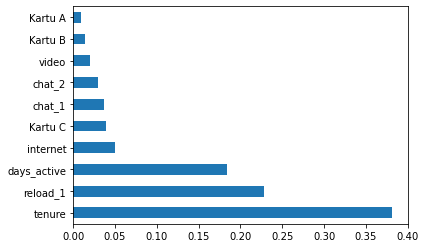

In [23]:
feature_penting = pd.Series(model.feature_importances_,index=X.columns)
feature_penting.nlargest(10).plot(kind='barh')